In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [51]:
df_edges = pd.read_excel('edges_new2.xlsx')
df_nodes = pd.read_excel('nodes_new.xlsx')

In [52]:
df_edges.head()

,Source,Target,Type,Weight
0,230,345,Undirected,15
1,230,387,Undirected,11
2,230,412,Undirected,8
3,345,387,Undirected,11
4,345,412,Undirected,8


In [53]:
df_nodes.tail()

,Label,Id,Latitude,longitude
416,תלמים,417,168900,608135
417,תנובות,418,196689,690224
418,תעשיון צריפין,419,186262,652278
419,תפרח,420,169368,581637
420,תקומה,421,160037,595604


In [54]:
# df_edges['source_X'] = 0
# df_edges['source_Y'] = 0
# df_edges['target_X'] = 0
# df_edges['target_Y'] = 0
df_edges['gaza_X'] = 140717.52155372 # TODO need to write the right number
df_edges['gaza_Y'] = 590821.42507749 # TODO need to write the right number


df_edges.head()

,Source,Target,Type,Weight,gaza_X,gaza_Y
0,230,345,Undirected,15,140717.521554,590821.425077
1,230,387,Undirected,11,140717.521554,590821.425077
2,230,412,Undirected,8,140717.521554,590821.425077
3,345,387,Undirected,11,140717.521554,590821.425077
4,345,412,Undirected,8,140717.521554,590821.425077


In [55]:

df_new = pd.merge(df_edges, df_nodes[['Id', 'Latitude ','longitude ']], left_on="Source", right_on="Id")

In [56]:
df_new.columns

Index(['Source', 'Target', 'Type', 'Weight', 'gaza_X', 'gaza_Y', 'Id',
       'Latitude ', 'longitude '],
      dtype='object')

In [57]:

df_new = df_new.rename({'Latitude ':'source_Y','longitude ':'source_X'}, axis = 1)
df_new.head()

,Source,Target,Type,Weight,gaza_X,gaza_Y,Id,source_Y,source_X
0,230,345,Undirected,15,140717.521554,590821.425077,230,144060,573257
1,230,387,Undirected,11,140717.521554,590821.425077,230,144060,573257
2,230,412,Undirected,8,140717.521554,590821.425077,230,144060,573257
3,230,317,Undirected,3,140717.521554,590821.425077,230,144060,573257
4,230,286,Undirected,5,140717.521554,590821.425077,230,144060,573257


In [58]:
df_new = pd.merge(df_new, df_nodes[['Id', 'Latitude ','longitude ']], left_on="Target", right_on="Id")

In [59]:
df_edges = df_new.rename({'Latitude ':'target_Y','longitude ':'target_X'}, axis = 1)
df_edges.head()

,Source,Target,Type,Weight,gaza_X,gaza_Y,Id_x,source_Y,source_X,Id_y,target_Y,target_X
0,230,345,Undirected,15,140717.521554,590821.425077,230,144060,573257,345,145266,571905
1,250,345,Undirected,2,140717.521554,590821.425077,250,158364,601282,345,145266,571905
2,275,345,Undirected,3,140717.521554,590821.425077,275,152270,598074,345,145266,571905
3,304,345,Undirected,2,140717.521554,590821.425077,304,155784,597820,345,145266,571905
4,25,345,Undirected,2,140717.521554,590821.425077,25,159681,619836,345,145266,571905


In [50]:
# for i in range(42833):
#     df_edges['source_X'][i] = df_nodes.loc[df_nodes["Id"] == df_edges['Source'][i], "longitude "]
#     df_edges['source_Y'][i] = df_nodes.loc[df_nodes["Id"] == df_edges['Source'][i], "Latitude "]
#     df_edges['target_X'][i] = df_nodes.loc[df_nodes["Id"] == df_edges['Target'][i], "longitude "]
#     df_edges['target_Y'][i] = df_nodes.loc[df_nodes["Id"] == df_edges['Target'][i], "Latitude "]



In [60]:
df_edges['dist_from_each_other'] = np.sqrt(np.power(df_edges['source_X'] - df_edges['target_X'],2) + np.power(df_edges['source_Y'] - df_edges['target_Y'],2))
df_edges['dist_from_gazza_for_Source'] = np.sqrt(np.power(df_edges['source_X'] - df_edges['gaza_X'],2) + np.power(df_edges['source_Y'] - df_edges['gaza_Y'],2))
df_edges['dist_from_gazza_for_Target'] = np.sqrt(np.power(df_edges['target_X'] - df_edges['gaza_X'],2) + np.power(df_edges['target_Y'] - df_edges['gaza_Y'],2))
df_edges

,Source,Target,Type,Weight,gaza_X,gaza_Y,Id_x,source_Y,source_X,Id_y,target_Y,target_X,dist_from_each_other,dist_from_gazza_for_Source,dist_from_gazza_for_Target
0,230,345,Undirected,15,140717.521554,590821.425077,230,144060,573257,345,145266,571905,1811.722937,621840.953421,620034.094534
1,250,345,Undirected,2,140717.521554,590821.425077,250,158364,601282,345,145266,571905,32164.665908,631774.535187,620034.094534
2,275,345,Undirected,3,140717.521554,590821.425077,275,152270,598074,345,145266,571905,27090.082632,633642.092047,620034.094534
3,304,345,Undirected,2,140717.521554,590821.425077,304,155784,597820,345,145266,571905,27968.116651,631031.090375,620034.094534
4,25,345,Undirected,2,140717.521554,590821.425077,25,159681,619836,345,145266,571905,50051.703128,644543.701020,620034.094534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42828,322,375,Undirected,1,140717.521554,590821.425077,322,210944,633077,375,207024,631242,4328.235784,621871.943489,622828.007921
42829,344,375,Undirected,1,140717.521554,590821.425077,344,211407,632319,375,207024,631242,4513.382102,620988.985061,622828.007921
42830,358,375,Undirected,1,140717.521554,590821.425077,358,209642,634564,375,207024,631242,4229.610857,623844.610762,622828.007921
42831,360,375,Undirected,1,140717.521554,590821.425077,360,211410,635314,375,207024,631242,5984.829154,623360.815235,622828.007921


In [61]:
np.max(df_edges['dist_from_each_other'])

203207.82992788442

In [62]:
np.min(df_edges['dist_from_each_other'])

560.37576678511

In [63]:
list_of_range = list(range(0,200000,5000)) # if we normelized the data beween [0:1], jumping of 5000 is equal to 0.025 (5000/200000)
list_of_weight_by_ranges = np.zeros(len(list_of_range) + 1)
list_of_count_by_ranges = np.zeros_like(list_of_weight_by_ranges)
for t, range_from_each in enumerate(list_of_range):
    if t == 0:
        continue
    list_of_weight_by_ranges[t]= np.mean(
        df_edges.loc[(df_edges["dist_from_each_other"] <=  list_of_range[t]) &
                     (df_edges["dist_from_each_other"]>list_of_range[t-1]), ["Weight"]]
    )
    list_of_count_by_ranges[t]= len(
        df_edges.loc[(df_edges["dist_from_each_other"] <=  list_of_range[t]) &
                     (df_edges["dist_from_each_other"]>list_of_range[t-1]), ["Weight"]]
    )

list_of_count_by_ranges.astype(int)

array([   0, 1735, 3709, 4363, 4062, 3741, 3182, 2997, 2559, 2679, 2354,
       2237, 1837, 1566, 1250, 1029,  899,  637,  463,  370,  364,  291,
        211,  116,   69,   38,   20,    7,    7,    4,    3,    3,    1,
          4,    5,    1,    5,    5,    0,    1,    0])

<ipython-input-64-1d6e08472c10>:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(list_of_range,np.log(list_of_count_by_ranges[1:]),'-+')


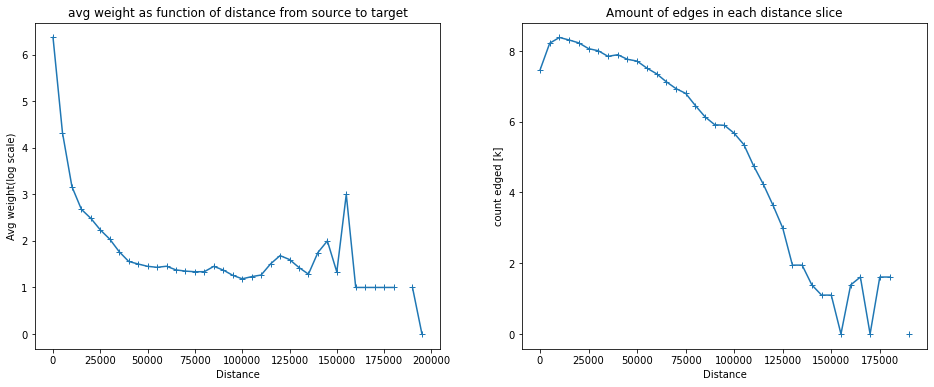

In [64]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(list_of_range,list_of_weight_by_ranges[1:],'-+')
#plt.plot(list_of_range,list_of_weight_by_ranges[1:],'+')

plt.title('avg weight as function of distance from source to target')
plt.xlabel('Distance')
plt.ylabel('Avg weight(log scale)')
plt.subplot(1,2,2)

plt.title('Amount of edges in each distance slice')
plt.xlabel('Distance')
plt.ylabel('count edged [k]')
plt.plot(list_of_range,np.log(list_of_count_by_ranges[1:]),'-+')


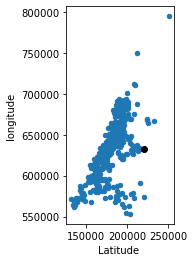

In [66]:
df_nodes.plot.scatter(x='Latitude ',y='longitude ')
jeru=df_nodes.loc[df_nodes.Label=='ירושלים']
jeru
plt.plot([220947],[632242],'ok')
plt.gca().set_aspect(1)

In [67]:
from scipy.optimize import curve_fit

In [68]:
##print(curve_fit.__doc__)

In [69]:
#list_of_range,list_of_weight_by_ranges[1:]

x = np.array(list_of_range[:-10])
y_data = list_of_weight_by_ranges[1:-10]

x.shape, y_data.shape

((30,), (30,))

In [70]:
f= lambda x, a,b,c: b*np.exp(-a*x) + c
p0=0.001
p1=6.
p2=1.
curve_fit(f, x, y_data,( p0,p1,p2) )

<ipython-input-70-893aba76a678>:1: RuntimeWarning: overflow encountered in exp
  f= lambda x, a,b,c: b*np.exp(-a*x) + c


(array([8.76774726e-05, 4.75791382e+00, 1.45009695e+00]),
 array([[ 4.08498530e-11,  4.96414550e-07,  1.19255536e-07],
        [ 4.96414550e-07,  3.33103054e-02, -1.11263995e-03],
        [ 1.19255536e-07, -1.11263995e-03,  1.90543726e-03]]))

In [71]:
a, b, c =8.76774726e-05, 4.75791382e+00, 1.45009695e+0

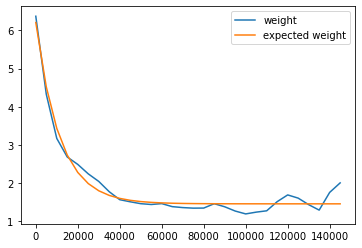

In [72]:
plt.plot(x,y_data,label = 'weight')

plt.plot(x,f(x,a, b,c),label = 'expected weight')
plt.legend()

In [73]:
df_edges['expected_weight']= f(df_edges["dist_from_each_other"],a,b,c)


In [74]:
#normalize the distance

df_edges['delta_Aza']=(np.abs (df_edges["dist_from_gazza_for_Source"] - df_edges["dist_from_gazza_for_Target"]))// 10000

In [75]:
df_edges['delta_Aza'].value_counts()

0.0     15569
1.0     11325
2.0      7703
3.0      4480
4.0      1402
5.0       926
6.0       664
7.0       449
8.0       215
9.0        74
10.0       17
12.0        4
11.0        3
13.0        2
Name: delta_Aza, dtype: int64

In [76]:
df_edges.head(20)

,Source,Target,Type,Weight,gaza_X,gaza_Y,Id_x,source_Y,source_X,Id_y,target_Y,target_X,dist_from_each_other,dist_from_gazza_for_Source,dist_from_gazza_for_Target,expected_weight,delta_Aza
0,230,345,Undirected,15,140717.521554,590821.425077,230,144060,573257,345,145266,571905,1811.722937,621840.953421,620034.094534,5.509200,0.0
1,250,345,Undirected,2,140717.521554,590821.425077,250,158364,601282,345,145266,571905,32164.665908,631774.535187,620034.094534,1.733664,1.0
2,275,345,Undirected,3,140717.521554,590821.425077,275,152270,598074,345,145266,571905,27090.082632,633642.092047,620034.094534,1.892568,1.0
3,304,345,Undirected,2,140717.521554,590821.425077,304,155784,597820,345,145266,571905,27968.116651,631031.090375,620034.094534,1.859783,1.0
4,25,345,Undirected,2,140717.521554,590821.425077,25,159681,619836,345,145266,571905,50051.703128,644543.701020,620034.094534,1.509193,2.0
5,222,345,Undirected,3,140717.521554,590821.425077,222,156588,612726,345,145266,571905,42362.031644,641366.253540,620034.094534,1.566071,2.0
6,242,345,Undirected,2,140717.521554,590821.425077,242,160122,603225,345,145266,571905,34664.724664,631993.008174,620034.094534,1.677847,1.0
7,1,345,Undirected,2,140717.521554,590821.425077,1,162974,604773,345,145266,571905,37334.684785,631190.071390,620034.094534,1.630313,1.0
8,4,345,Undirected,2,140717.521554,590821.425077,4,161506,604180,345,145266,571905,36130.502695,631750.902759,620034.094534,1.650380,1.0
9,41,345,Undirected,1,140717.521554,590821.425077,41,158889,607730,345,145266,571905,38327.754356,636133.849797,620034.094534,1.615285,1.0


In [78]:
df = df_edges.groupby(by=["delta_Aza"])['Weight','expected_weight'].agg('sum')


<ipython-input-78-ad88a36335ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df_edges.groupby(by=["delta_Aza"])['Weight','expected_weight'].agg('sum')


In [79]:
df.head()

,Weight,expected_weight
delta_Aza,,
0.0,57598,47063.301589
1.0,23479,22801.365829
2.0,10211,12410.500649
3.0,5004,6733.283640
4.0,1838,2070.835311


In [80]:
df['divide']=df['Weight']/df['expected_weight']
df.head(25)

,Weight,expected_weight,divide
delta_Aza,,,
0.0,57598,47063.301589,1.223841
1.0,23479,22801.365829,1.029719
2.0,10211,12410.500649,0.822771
3.0,5004,6733.283640,0.743174
4.0,1838,2070.835311,0.887565
5.0,1747,1356.428065,1.287942
6.0,1520,966.937352,1.571974
7.0,765,652.145808,1.173051
8.0,276,312.010692,0.884585


Text(0, 0.5, 'ratio between weight and expected weight')

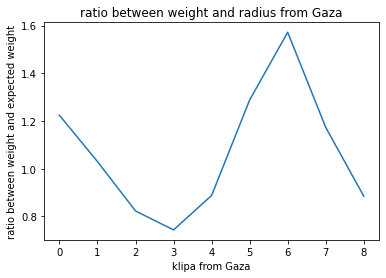

In [81]:
plt.plot(df.index[:9],df['divide'][:8])
plt.title('ratio between weight and radius from Gaza')
plt.xlabel('klipa from Gaza')
plt.ylabel('ratio between weight and expected weight')

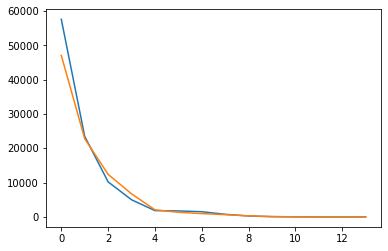

In [82]:
plt.plot(df.index,df['Weight'])
plt.plot(df.index,df['expected_weight'])

In [83]:
#hypothesis #2

In [88]:
# second hypotize
df_edges['difference_from_gazza_to_source_and_target']= np.abs(df_edges['dist_from_gazza_for_Source'] - df_edges['dist_from_gazza_for_Target'])

In [89]:
df_edges.head()

,Source,Target,Type,Weight,gaza_X,gaza_Y,Id_x,source_Y,source_X,Id_y,target_Y,target_X,dist_from_each_other,dist_from_gazza_for_Source,dist_from_gazza_for_Target,expected_weight,delta_Aza,difference_from_gazza_to_source_and_target
0,230,345,Undirected,15,140717.521554,590821.425077,230,144060,573257,345,145266,571905,1811.722937,621840.953421,620034.094534,5.509200,0.0,1806.858887
1,250,345,Undirected,2,140717.521554,590821.425077,250,158364,601282,345,145266,571905,32164.665908,631774.535187,620034.094534,1.733664,1.0,11740.440653
2,275,345,Undirected,3,140717.521554,590821.425077,275,152270,598074,345,145266,571905,27090.082632,633642.092047,620034.094534,1.892568,1.0,13607.997513
3,304,345,Undirected,2,140717.521554,590821.425077,304,155784,597820,345,145266,571905,27968.116651,631031.090375,620034.094534,1.859783,1.0,10996.995841
4,25,345,Undirected,2,140717.521554,590821.425077,25,159681,619836,345,145266,571905,50051.703128,644543.701020,620034.094534,1.509193,2.0,24509.606486


In [90]:
np.max(df_edges['difference_from_gazza_to_source_and_target'])

134669.89592359937

In [92]:
df_edges['difference_from_gazza_to_source_and_target'].min()

1.9282977111870423

In [93]:
list_of_range = list(range(0,200000,5000)) # if we normelized the data beween [0:1], jumping of 5000 is equal to 0.025 (5000/200000)
list_of_weight_by_ranges = np.zeros(len(list_of_range) + 1)
list_of_count_by_ranges = np.zeros_like(list_of_weight_by_ranges)
for t, range_from_each in enumerate(list_of_range):
    if t == 0:
        continue
    list_of_weight_by_ranges[t]= np.mean(
        df_edges.loc[(df_edges["difference_from_gazza_to_source_and_target"] <=  list_of_range[t]) &
                     (df_edges["difference_from_gazza_to_source_and_target"]>list_of_range[t-1]), ["Weight"]]
    )
    list_of_count_by_ranges[t]= len(
        df_edges.loc[(df_edges["difference_from_gazza_to_source_and_target"] <=  list_of_range[t]) &
                     (df_edges["difference_from_gazza_to_source_and_target"]>list_of_range[t-1]), ["Weight"]]
    )

list_of_count_by_ranges.astype(int)

array([   0, 8327, 7242, 5994, 5331, 4288, 3415, 2684, 1796,  874,  528,
        458,  468,  367,  297,  246,  203,  124,   91,   45,   29,   13,
          4,    0,    3,    2,    2,    2,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])

<ipython-input-94-3515d18b1801>:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(list_of_range,np.log(list_of_count_by_ranges[1:]),'-+')


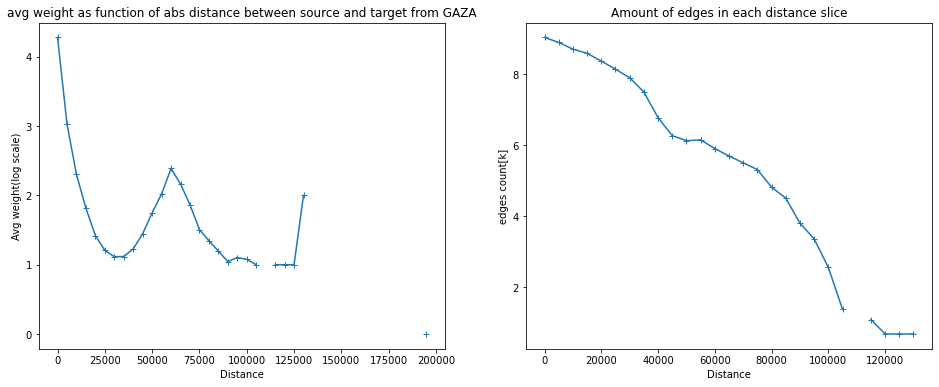

In [94]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(list_of_range,list_of_weight_by_ranges[1:],'-+')
#plt.plot(list_of_range,list_of_weight_by_ranges[1:],'+')

plt.title('avg weight as function of abs distance between source and target from GAZA')
plt.xlabel('Distance')
plt.ylabel('Avg weight(log scale)')
plt.subplot(1,2,2)

plt.title('Amount of edges in each distance slice')
plt.xlabel('Distance')
plt.ylabel('edges count[k]')
plt.plot(list_of_range,np.log(list_of_count_by_ranges[1:]),'-+')

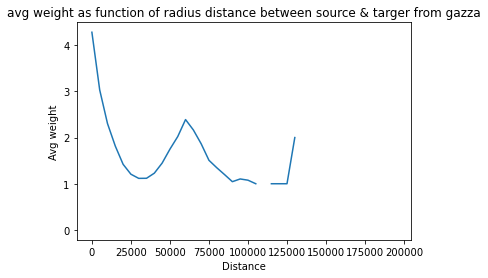

In [95]:
plt.plot(list_of_range,list_of_weight_by_ranges[1:])
plt.title('avg weight as function of radius distance between source & targer from gazza')
plt.xlabel('Distance')
plt.ylabel('Avg weight')
plt.show()

In [96]:
#df_edges.to_excel('distances_2.xlsx')

In [97]:
#df_miri = df_edges [['Source','Target' ,'source_X','source_Y','target_X','target_Y']]


In [98]:
df_miri.head()

,Source,Target,source_X,source_Y,target_X,target_Y
0,230,345,573257,144060,571905,145266
1,250,345,601282,158364,571905,145266
2,275,345,598074,152270,571905,145266
3,304,345,597820,155784,571905,145266
4,25,345,619836,159681,571905,145266


In [ ]:
#df_miri.to_csv('distances_2.csv')

In [99]:
pwd


'C:\\Users\\12345\\Documents\\מדעי הרשתות - ברוך'